You are given an array of events where events[i] = [startDayi, endDayi, valuei]. The ith event starts at startDayi and ends at endDayi, and if you attend this event, you will receive a value of valuei. You are also given an integer k which represents the maximum number of events you can attend.

You can only attend one event at a time. If you choose to attend an event, you must attend the entire event. Note that the end day is inclusive: that is, you cannot attend two events where one of them starts and the other ends on the same day.

Return the maximum sum of values that you can receive by attending events.

 

Example 1:

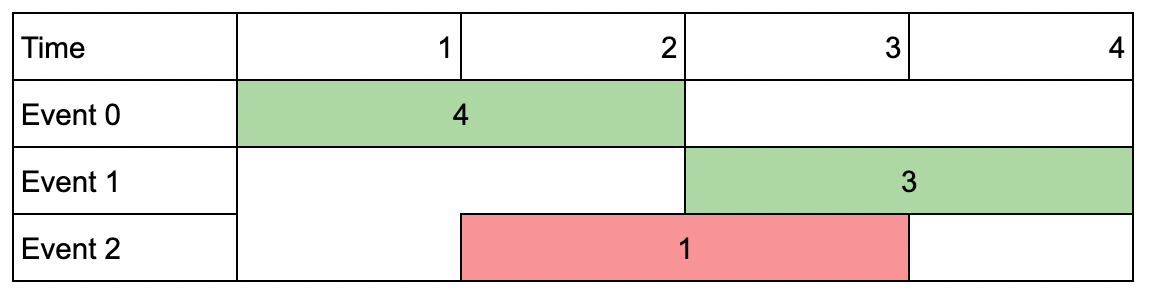

Input: events = [[1,2,4],[3,4,3],[2,3,1]], k = 2
Output: 7
Explanation: Choose the green events, 0 and 1 (0-indexed) for a total value of 4 + 3 = 7.

Example 2:

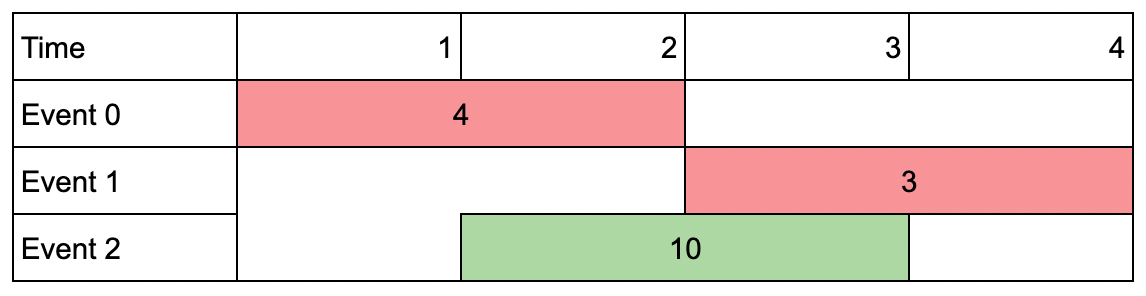

Input: events = [[1,2,4],[3,4,3],[2,3,10]], k = 2
Output: 10
Explanation: Choose event 2 for a total value of 10.
Notice that you cannot attend any other event as they overlap, and that you do not have to attend k events.

Example 3:

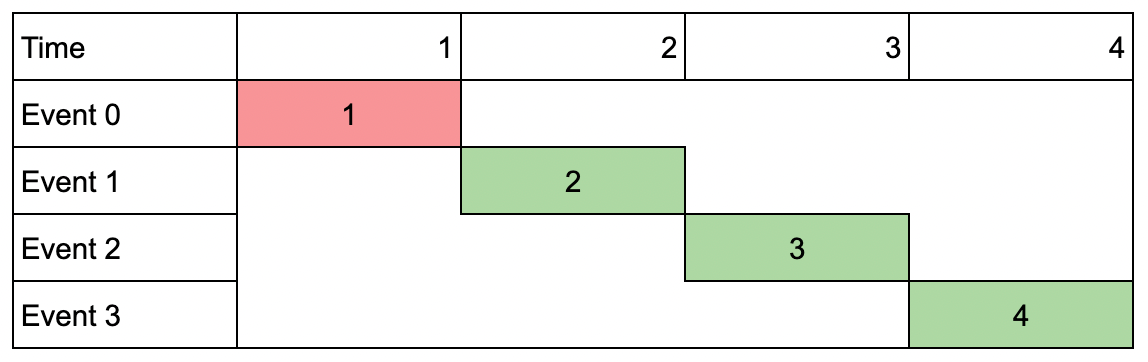

Input: events = [[1,1,1],[2,2,2],[3,3,3],[4,4,4]], k = 3
Output: 9
Explanation: Although the events do not overlap, you can only attend 3 events. Pick the highest valued three.

 

Constraints:

    1 <= k <= events.length
    1 <= k * events.length <= 106
    1 <= startDayi <= endDayi <= 109
    1 <= valuei <= 106



In [ ]:
class Solution:
    def maxValue(self, events: List[List[int]], k: int) -> int:
        events.sort()
        n = len(events)
        starts = [start for start, end, value in events]
        dp = [[-1] * n for _ in range(k + 1)]
        
        def dfs(cur_index, count):
            if count == 0 or cur_index == n:
                return 0
            if dp[count][cur_index] != -1:
                return dp[count][cur_index]

            # Find the nearest available event after attending event 0.

            next_index = bisect_right(starts, events[cur_index][1])
            dp[count][cur_index] = max(dfs(cur_index + 1, count), events[cur_index][2] + dfs(next_index, count - 1))
            return dp[count][cur_index]
        
        return dfs(0, k)


In [ ]:
class Solution:
    def maxValue(self, events: List[List[int]], k: int) -> int:        
        n = len(events)
        dp = [[0] * (n + 1) for _ in range(k + 1)]
        events.sort()
        starts = [start for start, end, value in events]

        for cur_index in range(n - 1, -1, -1):
            for count in range(1, k + 1):
                next_index = bisect_right(starts, events[cur_index][1])
                dp[count][cur_index] = max(dp[count][cur_index + 1], events[cur_index][2] + dp[count - 1][next_index])
        
        return dp[k][0]